# Heating and Cooling load of the builing

### Variables explanation.


X1	: Relative Compactness
X2	: Surface Area 
X3	: Wall Area 
X4	: Roof Area 
X5	: Overall Height 
X6	: Orientation 
X7	: Glazing Area 
X8	: Glazing Area Distribution 
y1	: Heating Load 
y2	: Cooling Load

In [318]:
import pandas as pd
import numpy as np

### Read the data set 

In [319]:
data = pd.read_csv('ENB2012_data.csv')

In [320]:
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


#### Combine cooling data and heating data to find the overall load 

In [321]:
data["Y"] = data["Y1"].add(data["Y2"])

In [322]:
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2,Y
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33,36.88
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33,36.88
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33,36.88
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33,36.88
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28,49.12


#### Divide Y into three classes
1 = high efficiency
2 = average efficiency
3 = low efficiency

In [323]:
data['Y'] = pd.cut(data['Y'], 3, labels=[1,2,3])

In [324]:
data

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2,Y
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33,1
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33,1
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33,1
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33,1
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28,2
5,0.90,563.5,318.5,122.50,7.0,3,0.0,0,21.46,25.38,2
6,0.90,563.5,318.5,122.50,7.0,4,0.0,0,20.71,25.16,2
7,0.90,563.5,318.5,122.50,7.0,5,0.0,0,19.68,29.60,2
8,0.86,588.0,294.0,147.00,7.0,2,0.0,0,19.50,27.30,2
9,0.86,588.0,294.0,147.00,7.0,3,0.0,0,19.95,21.97,2


### Assign X and Y

In [325]:
X = data.drop(['Y1','Y2','Y'], axis = 1)
y = data['Y']

In [326]:
X.head()

,X1,X2,X3,X4,X5,X6,X7,X8
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0


In [327]:
y.head()

0    1
1    1
2    1
3    1
4    2
Name: Y, dtype: category
Categories (3, int64): [1 < 2 < 3]

## Split and scale

In [328]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 0)

In [329]:
X.shape

(768, 8)

In [330]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_a = scaler.fit_transform(X_train)
X_test_a = scaler.transform(X_test)

## Run different models to find the best one.

## KNN classification
Picked 5 as the neighbor from the grid search

In [372]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [373]:
from sklearn.model_selection import GridSearchCV

knn_clf = KNeighborsClassifier()

param_grid = {'n_neighbors':[1,3,4,5, 10, 20, 50]}

grid_search = GridSearchCV(knn_clf , param_grid, cv = 10 , return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 3, 4, 5, 10, 20, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [374]:
grid_search.best_params_

{'n_neighbors': 5}

#### Fit the model

In [375]:
knn = KNeighborsClassifier(n_neighbors = 5).fit(X_train, y_train)

#### Get the R2 score

In [376]:
from sklearn.metrics import r2_score

y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

print('Train r2: {:.5f}'.format(r2_score(y_train, y_train_predict)))
print('Test r2: {:.5f}'.format(r2_score(y_test, y_test_predict)))

Train r2: 0.94017
Test r2: 0.89055


In [377]:
y_test_predict = np.round(y_test_predict)
y_test_predict 

array([1, 1, 3, 2, 2, 2, 2, 2, 2, 2, 1, 3, 1, 3, 3, 2, 1, 3, 1, 1, 1, 2, 1,
       3, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 2, 3, 1, 3, 1, 1, 1, 3, 1, 2, 2, 2,
       1, 1, 2, 2, 2, 1, 3, 1, 3, 1, 2, 2, 3, 1, 1, 1, 3, 1, 1, 1, 3, 1, 2,
       3, 2, 1, 2, 1, 1, 2, 2, 3, 2, 1, 3, 2, 1, 1, 2, 2, 2, 3, 1, 1, 1, 2,
       1, 2, 3, 1, 2, 1, 1, 3, 3, 2, 2, 3, 1, 2, 3, 1, 1, 2, 1, 3, 2, 1, 1,
       1, 1, 3, 2, 3, 3, 1, 1, 3, 1, 3, 1, 2, 1, 2, 3, 2, 3, 1, 3, 1, 2, 2,
       3, 1, 1, 1, 2, 1, 3, 1, 2, 3, 1, 1, 2, 1, 1, 1, 1, 3, 3, 2, 1, 2, 3,
       1, 2, 2, 1, 1, 1, 2, 1, 2, 3, 1, 3, 3, 3, 2, 2, 2, 1, 2, 1, 3, 2, 1,
       1, 2, 1, 1, 2, 1, 1, 1], dtype=int64)

## Logistic Regression

In [378]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

lreg_clf = LogisticRegression(random_state = 0)

param_grid = {'penalty':['l1', 'l2']}

grid_search = GridSearchCV(lreg_clf , param_grid, cv = 5 , return_train_score=True)
grid_search.fit(X_train_a, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2']}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring=None, verbose=0)

In [379]:
grid_search.best_params_

{'penalty': 'l1'}

#### Fit the model

In [380]:
lr_clf = LogisticRegression(penalty = 'l1', random_state = 0).fit(X_train_a, y_train)

#### Get the R2 score

In [381]:
from sklearn.metrics import r2_score

y_train_predict = lr_clf.predict(X_train_a)
y_test_predict = lr_clf.predict(X_test_a)

print('Train r2: {:.5f}'.format(r2_score(y_train, y_train_predict)))
print('Test r2: {:.5f}'.format(r2_score(y_test, y_test_predict)))

Train r2: 0.82312
Test r2: 0.85928


## Linear Supprt Vector Machine 

In [382]:
from sklearn.svm import SVC

In [383]:
lsvc_clf = SVC(kernel = 'linear')

#### To find C for linearSVC

In [384]:
from sklearn.model_selection import GridSearchCV

svc = SVC(kernel = 'linear', random_state = 0)
param_grid = {'C':[0.01, 0.05, 0.1, 0.5, 1, 5]}

grid_search = GridSearchCV(svc, param_grid, cv = 5)
grid_search.fit(X_train_a, y_train)


GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.01, 0.05, 0.1, 0.5, 1, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [385]:
print('Best parameters{}'.format(grid_search.best_params_))
print('Best score {:.6f}'.format(grid_search.best_score_))

Best parameters{'C': 5}
Best score 0.883681


#### Fit the model

In [386]:
lsvc_clf = SVC(kernel = 'linear', C=5, random_state = 0).fit(X_train_a, y_train)

#### Get the R2 score

In [387]:
from sklearn.metrics import r2_score

y_train_predict = lsvc_clf.predict(X_train_a)
y_test_predict = lsvc_clf.predict(X_test_a)

print('Train r2: {:.5f}'.format(r2_score(y_train, y_train_predict)))
print('Test r2: {:.5f}'.format(r2_score(y_test, y_test_predict)))

Train r2: 0.81271
Test r2: 0.84365


## Kerenilzed Support Vector Machine
Picked 5 as C and 5 as gamma from the gridsearchCV.

In [388]:
kernel_svc = SVC(kernel ='rbf')

In [389]:
from sklearn.model_selection import GridSearchCV

svc = SVC(kernel = 'rbf', random_state = 0)
param_grid = {'C':[0.01, 0.05, 0.1, 0.5, 1, 5], 'gamma':[0.01, 0.05, 0.1, 1, 5]}

grid_search = GridSearchCV(svc, param_grid, cv = 5)
grid_search.fit(X_train_a, y_train)


GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.01, 0.05, 0.1, 0.5, 1, 5], 'gamma': [0.01, 0.05, 0.1, 1, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [390]:
print('Best parameters{}'.format(grid_search.best_params_))
print('Best score {:.6f}'.format(grid_search.best_score_))

Best parameters{'C': 5, 'gamma': 5}
Best score 0.932292


#### Fit the model

In [391]:
kernel_svc = SVC(kernel = 'rbf', C = 5, gamma = 5, random_state = 0).fit(X_train_a, y_train)

#### Get the R2 score

In [392]:
from sklearn.metrics import r2_score

y_train_predict = kernel_svc.predict(X_train_a)
y_test_predict = kernel_svc.predict(X_test_a)

print('Train r2: {:.5f}'.format(r2_score(y_train, y_train_predict)))
print('Test r2: {:.5f}'.format(r2_score(y_test, y_test_predict)))

Train r2: 0.97399
Test r2: 0.92964


# Decision Tree
Picked 7 as the depth from the gridsearchCV

In [446]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

decision = DecisionTreeClassifier(random_state = 0)
param_grid = {'max_depth':[1,3,5,7,10,15,20]}

grid_search = GridSearchCV(decision, param_grid, cv = 5)
grid_search.fit(X_train_a, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 3, 5, 7, 10, 15, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [447]:
print('Best parameters{}'.format(grid_search.best_params_))
print('Best score {:.6f}'.format(grid_search.best_score_))

Best parameters{'max_depth': 7}
Best score 0.953125


#### Fit the model

In [448]:
from sklearn.tree import DecisionTreeClassifier

dtc_clf = DecisionTreeClassifier(max_depth = 7, random_state = 0).fit(X_train_a, y_train)

#### Get the R2 score

In [449]:
from sklearn.metrics import r2_score

y_train_predict = dtc_clf.predict(X_train_a)
y_test_predict = dtc_clf.predict(X_test_a)

print('Train r2: {:.5f}'.format(r2_score(y_train, y_train_predict)))
print('Test r2: {:.5f}'.format(r2_score(y_test, y_test_predict)))

Train r2: 0.96358
Test r2: 0.95309


# Ensemble model

## Random Forest 

In [451]:
from sklearn.ensemble import RandomForestClassifier

rfc_clf = RandomForestClassifier(max_features = 4, random_state = 0)
rfc_clf.fit(X_train_a, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=4, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [452]:
from sklearn.metrics import r2_score

y_train_predict = rfc_clf.predict(X_train_a)
y_test_predict = rfc_clf.predict(X_test_a)

print('Train r2: {:.5f}'.format(r2_score(y_train, y_train_predict)))
print('Test r2: {:.5f}'.format(r2_score(y_test, y_test_predict)))

Train r2: 0.99740
Test r2: 0.93746


### Voting Classifier
Hard voting

In [398]:
from sklearn.ensemble import VotingClassifier


knn = KNeighborsClassifier(n_neighbors = 5)
lr_clf = LogisticRegression(penalty = 'l1', random_state = 0)
lsvc_clf = SVC(kernel = 'linear', C=5, random_state = 0)
svc_clf = SVC(kernel = 'rbf', C = 5, gamma = 5, random_state = 0)
dtc_clf = DecisionTreeClassifier(max_depth = 7, random_state = 0)

voting_clf = VotingClassifier(estimators=[('knn', knn),('logistic', lr_clf),('linear svc', lsvc_clf),('kernel svc', svc_clf)
                                          ,('dtc', dtc_clf)], voting='hard')
voting_clf.fit(X_train_a, y_train)

VotingClassifier(estimators=[('knn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')), ('logistic', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scal...         min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

In [399]:
from sklearn.metrics import accuracy_score

for clf in (knn, lr_clf, lsvc_clf, svc_clf, dtc_clf, voting_clf):
    clf.fit(X_train_a, y_train)
    y_pred = clf.predict(X_test_a)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

KNeighborsClassifier 0.890625
LogisticRegression 0.90625
SVC 0.895833333333
SVC 0.953125
DecisionTreeClassifier 0.96875
VotingClassifier 0.932291666667


#### Get the R2 score

In [400]:
from sklearn.metrics import r2_score

y_train_predict = voting_clf.predict(X_train_a)
y_test_predict = voting_clf.predict(X_test_a)

print('Train r2: {:.5f}'.format(r2_score(y_train, y_train_predict)))
print('Test r2: {:.5f}'.format(r2_score(y_test, y_test_predict)))

Train r2: 0.93237
Test r2: 0.89837


In [401]:
print(voting_clf.predict(X_test_a))

[1 1 3 1 3 2 2 3 2 2 1 3 1 3 3 2 1 2 1 1 1 3 1 3 1 1 1 1 1 3 1 1 3 1 2 3 1
 3 1 1 1 3 1 2 2 2 1 1 2 2 3 1 3 1 3 1 2 2 3 1 1 1 3 1 1 1 3 1 2 3 3 1 2 1
 1 2 3 3 3 1 3 2 1 1 3 2 2 3 1 1 1 2 1 2 3 1 2 1 1 3 2 2 2 3 1 2 3 1 1 2 1
 3 2 1 1 1 1 3 2 3 3 1 1 3 1 3 1 2 1 2 3 2 2 1 3 1 2 2 3 1 1 1 2 1 3 1 2 3
 1 1 2 1 1 1 1 3 2 2 1 2 3 1 2 3 1 1 1 2 1 2 3 1 2 3 3 2 2 2 1 2 1 3 2 1 1
 2 1 1 2 1 1 1]


#### Soft voting

In [402]:
knn = KNeighborsClassifier(n_neighbors = 5)
lr_clf = LogisticRegression(penalty = 'l1', random_state = 0)
lsvc_clf = SVC(kernel = 'linear',probability=True, C=5, random_state = 0)
svc_clf = SVC(kernel = 'rbf', C = 5,probability=True, gamma = 5, random_state = 0)
dtc_clf = DecisionTreeClassifier(max_depth = 7, random_state = 0)

voting_clf_soft = VotingClassifier(estimators=[('knn', knn),('logistic', lr_clf),('linear svc', lsvc_clf),('kernel svc', svc_clf)
                                          ,('dtc', dtc_clf)], voting='soft')
voting_clf_soft.fit(X_train_a, y_train)

VotingClassifier(estimators=[('knn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')), ('logistic', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scal...         min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'))],
         flatten_transform=None, n_jobs=1, voting='soft', weights=None)

In [403]:
from sklearn.metrics import accuracy_score

for clf in (knn, lr_clf, lsvc_clf, svc_clf, dtc_clf, voting_clf_soft):
    clf.fit(X_train_a, y_train)
    y_pred = clf.predict(X_test_a)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

KNeighborsClassifier 0.890625
LogisticRegression 0.90625
SVC 0.895833333333
SVC 0.953125
DecisionTreeClassifier 0.96875
VotingClassifier 0.942708333333


#### Get the R2 score

In [404]:
from sklearn.metrics import r2_score

y_train_predict = voting_clf.predict(X_train_a)
y_test_predict = voting_clf.predict(X_test_a)

print('Train r2: {:.5f}'.format(r2_score(y_train, y_train_predict)))
print('Test r2: {:.5f}'.format(r2_score(y_test, y_test_predict)))

Train r2: 0.93237
Test r2: 0.89837


In [405]:
print(voting_clf.predict(X_test_a))

[1 1 3 1 3 2 2 3 2 2 1 3 1 3 3 2 1 2 1 1 1 3 1 3 1 1 1 1 1 3 1 1 3 1 2 3 1
 3 1 1 1 3 1 2 2 2 1 1 2 2 3 1 3 1 3 1 2 2 3 1 1 1 3 1 1 1 3 1 2 3 3 1 2 1
 1 2 3 3 3 1 3 2 1 1 3 2 2 3 1 1 1 2 1 2 3 1 2 1 1 3 2 2 2 3 1 2 3 1 1 2 1
 3 2 1 1 1 1 3 2 3 3 1 1 3 1 3 1 2 1 2 3 2 2 1 3 1 2 2 3 1 1 1 2 1 3 1 2 3
 1 1 2 1 1 1 1 3 2 2 1 2 3 1 2 3 1 1 1 2 1 2 3 1 2 3 3 2 2 2 1 2 1 3 2 1 1
 2 1 1 2 1 1 1]


## Bagging ensembles

In [406]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

#### Apply on Logistic

In [407]:
bag_logi = BaggingClassifier(LogisticRegression(penalty = 'l1'), n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1, random_state=0)
bag_logi.fit(X_train_a, y_train)

BaggingClassifier(base_estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=100, n_estimators=500, n_jobs=-1, oob_score=False,
         random_state=0, verbose=0, warm_start=False)

#### Get the R2 score

In [408]:
from sklearn.metrics import r2_score

y_train_predict = bag_logi.predict(X_train_a)
y_test_predict = bag_logi.predict(X_test_a)

print('Train r2: {:.5f}'.format(r2_score(y_train, y_train_predict)))
print('Test r2: {:.5f}'.format(r2_score(y_test, y_test_predict)))

Train r2: 0.79971
Test r2: 0.85147


#### Apply on linear SVC

In [409]:
bag_svcl = BaggingClassifier(SVC(kernel = 'linear', C=5, probability=True), n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1, random_state=0)
bag_svcl.fit(X_train_a, y_train)

BaggingClassifier(base_estimator=SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=100, n_estimators=500, n_jobs=-1, oob_score=False,
         random_state=0, verbose=0, warm_start=False)

#### Get the R2 score

In [410]:
from sklearn.metrics import r2_score

y_train_predict = bag_svcl.predict(X_train_a)
y_test_predict = bag_svcl.predict(X_test_a)

print('Train r2: {:.5f}'.format(r2_score(y_train, y_train_predict)))
print('Test r2: {:.5f}'.format(r2_score(y_test, y_test_predict)))

Train r2: 0.81792
Test r2: 0.85928


#### Apply on Kernelized SVC

In [411]:
bag_svckbf =  BaggingClassifier(SVC(kernel = 'rbf', C = 5,probability=True, gamma = 5), n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1, random_state=0)
bag_svckbf.fit(X_train_a, y_train)

BaggingClassifier(base_estimator=SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=5, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=100, n_estimators=500, n_jobs=-1, oob_score=False,
         random_state=0, verbose=0, warm_start=False)

#### Get the R2 score

In [412]:
y_train_predict = bag_svckbf.predict(X_train_a)
y_test_predict = bag_svckbf.predict(X_test_a)

print('Train r2: {:.5f}'.format(r2_score(y_train, y_train_predict)))
print('Test r2: {:.5f}'.format(r2_score(y_test, y_test_predict)))

Train r2: 0.92977
Test r2: 0.88274


#### Apply on Decision Tree

In [413]:
bag_decision =  BaggingClassifier(DecisionTreeClassifier(max_depth = 15), n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1, random_state=0)
bag_decision.fit(X_train_a, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=15,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=100, n_estimators=500, n_jobs=-1, oob_score=False,
         random_state=0, verbose=0, warm_start=False)

#### Get the R2 score

In [414]:
from sklearn.metrics import r2_score

y_train_predict = bag_decision.predict(X_train_a)
y_test_predict = bag_decision.predict(X_test_a)

print('Train r2: {:.5f}'.format(r2_score(y_train, y_train_predict)))
print('Test r2: {:.5f}'.format(r2_score(y_test, y_test_predict)))

Train r2: 0.94277
Test r2: 0.90619


## Out-of-Bag evaluation

#### Apply on Logistic Regression

In [415]:
bag_out_logi = BaggingClassifier(
    LogisticRegression(penalty = 'l1'),n_estimators=500,
    bootstrap=True, n_jobs=-1, oob_score=True, random_state=0)
bag_out_logi.fit(X_train_a, y_train)
bag_out_logi.oob_score_

0.87326388888888884

#### Get the R2 score

In [416]:
y_train_predict = bag_out_logi.predict(X_train_a)
y_test_predict = bag_out_logi.predict(X_test_a)

print('Train r2: {:.5f}'.format(r2_score(y_train, y_train_predict)))
print('Test r2: {:.5f}'.format(r2_score(y_test, y_test_predict)))

Train r2: 0.82572
Test r2: 0.87492


#### Apply on Linear SVC

In [417]:
bag_out_svcl = BaggingClassifier(
    SVC(kernel = 'linear', C=5), n_estimators=500,
    bootstrap=True, n_jobs=-1, oob_score=True, random_state=0)
bag_out_svcl.fit(X_train_a, y_train)
bag_out_svcl.oob_score_

0.87673611111111116

#### Get the R2 score

In [418]:
y_train_predict = bag_out_svcl.predict(X_train_a)
y_test_predict = bag_out_svcl.predict(X_test_a)

print('Train r2: {:.5f}'.format(r2_score(y_train, y_train_predict)))
print('Test r2: {:.5f}'.format(r2_score(y_test, y_test_predict)))

Train r2: 0.82832
Test r2: 0.85147


#### Apply on Kernelized SVC

In [419]:
bag_out_svckbf = BaggingClassifier(
    SVC(kernel = 'rbf', C = 5, gamma = 5), n_estimators=500,
    bootstrap=True, n_jobs=-1, oob_score=True, random_state=0)
bag_out_svckbf.fit(X_train_a, y_train)
bag_out_svckbf.oob_score_

0.93229166666666663

#### Get the R2 score

In [420]:
y_train_predict = bag_out_svckbf.predict(X_train_a)
y_test_predict = bag_out_svckbf.predict(X_test_a)

print('Train r2: {:.5f}'.format(r2_score(y_train, y_train_predict)))
print('Test r2: {:.5f}'.format(r2_score(y_test, y_test_predict)))

Train r2: 0.98179
Test r2: 0.92964


#### Apply on Decision Tree

In [421]:
bag_out_decision = BaggingClassifier(
    DecisionTreeClassifier(max_depth = 7), n_estimators=500,
    bootstrap=True, n_jobs=-1, oob_score=True, random_state=0)
bag_out_decision.fit(X_train_a, y_train)
bag_out_decision.oob_score_

0.95659722222222221

#### Get the R2 score

In [422]:
y_train_predict = bag_out_decision.predict(X_train_a)
y_test_predict = bag_out_decision.predict(X_test_a)

print('Train r2: {:.5f}'.format(r2_score(y_train, y_train_predict)))
print('Test r2: {:.5f}'.format(r2_score(y_test, y_test_predict)))

Train r2: 0.97139
Test r2: 0.93746


# AdaBoost

#### Apply on Logistic Regression

In [423]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf_Lo = AdaBoostClassifier(
    LogisticRegression(penalty = 'l1'), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.5, random_state=0)
ada_clf_Lo.fit(X_train_a, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
          learning_rate=0.5, n_estimators=200, random_state=0)

In [424]:
from sklearn.metrics import r2_score

y_train_predict = ada_clf_Lo.predict(X_train_a)
y_test_predict = ada_clf_Lo.predict(X_test_a)

print('Train r2: {:.5f}'.format(r2_score(y_train, y_train_predict)))
print('Test r2: {:.5f}'.format(r2_score(y_test, y_test_predict)))

Train r2: -0.77402
Test r2: -0.89186


In [425]:
print(ada_clf_Lo.score(X_train_a, y_train))
print(ada_clf_Lo.score(X_test_a, y_test))

0.513888888889
0.473958333333


In [426]:
ada_clf_Lo.predict(X_test_a)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

#### Apply on Linear SVC

In [427]:
ada_clf_svcl = AdaBoostClassifier(n_estimators=200, base_estimator=SVC(kernel = 'linear', C=5, probability=True, random_state=0),
                   algorithm="SAMME.R", learning_rate=0.5, random_state=42)
ada_clf_svcl.fit(X_train_a, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=0, shrinking=True, tol=0.001,
  verbose=False),
          learning_rate=0.5, n_estimators=200, random_state=42)

In [428]:
y_train_predict = ada_clf_svcl.predict(X_train_a)
y_test_predict = ada_clf_svcl.predict(X_test_a)

print('Train r2: {:.5f}'.format(r2_score(y_train, y_train_predict)))
print('Test r2: {:.5f}'.format(r2_score(y_test, y_test_predict)))

Train r2: 0.62803
Test r2: 0.60130


In [429]:
print(ada_clf_svcl.score(X_train_a, y_train))
print(ada_clf_svcl.score(X_test_a, y_test))

0.751736111111
0.734375


In [430]:
ada_clf_svcl.predict(X_test_a)

array([1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 1, 1, 2, 1,
       2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2,
       1, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2,
       2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2,
       1, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 2, 2, 1, 1,
       1, 1, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2,
       2, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2,
       1, 2, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1,
       1, 2, 1, 1, 2, 1, 1, 1], dtype=int64)

#### Apply on Kernelized SVC

In [431]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf_svcrbf = AdaBoostClassifier(
    SVC(probability=True, kernel = 'rbf', C = 5, gamma = 5, random_state=42), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.5, random_state=0)
ada_clf_svcrbf.fit(X_train_a, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=5, kernel='rbf',
  max_iter=-1, probability=True, random_state=42, shrinking=True,
  tol=0.001, verbose=False),
          learning_rate=0.5, n_estimators=200, random_state=0)

In [432]:
y_train_predict = ada_clf_svcrbf.predict(X_train_a)
y_test_predict = ada_clf_svcrbf.predict(X_test_a)

print('Train r2: {:.5f}'.format(r2_score(y_train, y_train_predict)))
print('Test r2: {:.5f}'.format(r2_score(y_test, y_test_predict)))

Train r2: -0.52430
Test r2: -0.76678


In [433]:
print(ada_clf_svcrbf.score(X_train_a, y_train))
print(ada_clf_svcrbf.score(X_test_a, y_test))

0.555555555556
0.494791666667


In [434]:
ada_clf_svcrbf.predict(X_test_a)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

#### Apply on Decision Tree

In [435]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf_decision = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=15), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.5, random_state=0)
ada_clf_decision.fit(X_train_a, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=15,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.5, n_estimators=200, random_state=0)

In [436]:
y_train_predict = ada_clf_decision.predict(X_train_a)
y_test_predict = ada_clf_decision.predict(X_test_a)

print('Train r2: {:.5f}'.format(r2_score(y_train, y_train_predict)))
print('Test r2: {:.5f}'.format(r2_score(y_test, y_test_predict)))

Train r2: 1.00000
Test r2: 0.96091


In [437]:
print(ada_clf_decision.score(X_train_a, y_train))
print(ada_clf_decision.score(X_test_a, y_test))

1.0
0.973958333333


In [438]:
ada_clf_decision.predict(X_test_a)

array([1, 1, 3, 1, 3, 2, 2, 2, 2, 2, 1, 3, 1, 3, 3, 2, 1, 2, 1, 1, 1, 3, 1,
       3, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 2, 3, 1, 3, 1, 1, 1, 3, 1, 2, 2, 2,
       1, 1, 2, 2, 3, 1, 3, 1, 3, 1, 1, 2, 3, 1, 1, 1, 3, 1, 1, 1, 3, 1, 2,
       3, 3, 1, 2, 1, 1, 2, 3, 3, 3, 1, 3, 2, 1, 1, 2, 2, 2, 3, 1, 1, 1, 2,
       1, 2, 3, 1, 2, 1, 1, 3, 3, 2, 2, 3, 1, 2, 3, 1, 1, 1, 1, 3, 2, 1, 1,
       1, 1, 3, 2, 3, 3, 1, 1, 3, 1, 3, 1, 2, 1, 2, 3, 2, 3, 1, 3, 1, 2, 2,
       3, 1, 1, 2, 2, 1, 3, 1, 2, 3, 1, 1, 2, 1, 1, 1, 1, 3, 2, 2, 1, 2, 3,
       1, 2, 2, 1, 1, 1, 3, 1, 2, 3, 1, 3, 3, 3, 2, 2, 2, 1, 2, 1, 3, 2, 1,
       1, 2, 1, 1, 2, 1, 1, 1], dtype=int64)

## Gradient Boosting

#### Finding the Feature Importance

In [439]:
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.ensemble import GradientBoostingRegressor

params = {'n_estimators': 500, 'max_depth': 7,
        'learning_rate': 0.1, 'loss': 'huber','alpha':0.95}
clf = GradientBoostingRegressor(**params).fit(X, y)

In [440]:
mse = mean_squared_error(y_test, clf.predict(X_test_a))
r2 = r2_score(y_test, clf.predict(X_test_a))

print("MSE: %.4f" % mse)
print("R2: %.4f" % r2)

MSE: 0.8536
R2: -0.2813


#### Apply to Decision tree

In [441]:
dtc_clf1 = DecisionTreeClassifier(max_depth = 7)
dtc_clf1.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [442]:
y2 = y - dtc_clf1.predict(X)
dtc_clf2 = DecisionTreeClassifier(max_depth = 7)
dtc_clf2.fit(X, y2)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [443]:
y3= y2 - dtc_clf2.predict(X)
dtc_clf3 = DecisionTreeClassifier(max_depth = 7)
dtc_clf3.fit(X, y3)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [444]:
y_train_predict = dtc_clf3.predict(X_train_a)
y_test_predict = dtc_clf3.predict(X_test_a)

print('Train r2: {:.5f}'.format(r2_score(y_train, y_train_predict)))
print('Test r2: {:.5f}'.format(r2_score(y_test, y_test_predict)))

Train r2: -4.15038
Test r2: -4.34723


In [445]:
sum(dtc_clf.score(X, y) for dtc_clf in (dtc_clf1, dtc_clf2, dtc_clf3))

0.98046875

In [239]:
y_pred = sum(dtc_clf.predict(X) for dtc_clf in (dtc_clf1, dtc_clf2, dtc_clf3))
y_pred.astype(int)

array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 3, 2, 2, 3, 2, 2, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3,
       3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3,
       3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,
       3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 2, 3, 2, 2, 2,
       2, 2,

## Conclusion

After running classification models, I figured out that decision tree is the best model because it has high R2 score and the difference between the training data set and the test data set is not big as other models.

# Run the neural network to get a better model

In [454]:
from keras.models import Sequential
from keras.layers import Dense
import numpy

numpy.random.seed(10)

#### 1 - Define Model

In [455]:
# create model
model = Sequential()
model.add(Dense(8, input_dim=8, kernel_initializer='normal', activation='relu'))
model.add(Dense(6, kernel_initializer = 'normal', activation = 'relu'))
model.add(Dense(1, kernel_initializer='normal'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_787 (Dense)            (None, 8)                 72        
_________________________________________________________________
dense_788 (Dense)            (None, 6)                 54        
_________________________________________________________________
dense_789 (Dense)            (None, 1)                 7         
Total params: 133
Trainable params: 133
Non-trainable params: 0
_________________________________________________________________


#### 2- Compile Model

In [456]:
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

#### 3- Fit model

In [457]:
model.fit(X_train, y_train, epochs=50, batch_size=5)

Epoch 1/50
576/576 [==============================] - 8s 14ms/step - loss: 0.9633 - acc: 0.2396
Epoch 2/50
576/576 [==============================] - 1s 1ms/step - loss: 0.6241 - acc: 0.3837
Epoch 3/50
576/576 [==============================] - 1s 1ms/step - loss: 0.2894 - acc: 0.6719
Epoch 4/50
576/576 [==============================] - 1s 1ms/step - loss: 0.1986 - acc: 0.7500
Epoch 5/50
576/576 [==============================] - 1s 1ms/step - loss: 0.2174 - acc: 0.7378
Epoch 6/50
576/576 [==============================] - 1s 1ms/step - loss: 0.1874 - acc: 0.7813
Epoch 7/50
576/576 [==============================] - 1s 1ms/step - loss: 0.1844 - acc: 0.7604
Epoch 8/50
576/576 [==============================] - 1s 1ms/step - loss: 0.1781 - acc: 0.7882
Epoch 9/50
576/576 [==============================] - 1s 1ms/step - loss: 0.2108 - acc: 0.7500
Epoch 10/50
576/576 [==============================] - 1s 1ms/step - loss: 0.1712 - acc: 0.7882
Epoch 11/50
576/576 [===========================

#### Grid Search for finding epochs and batch size

In [308]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

def create_model():
    model = Sequential()
    model.add(Dense(8, input_dim=8, kernel_initializer='normal', activation='relu'))
    model.add(Dense(6, kernel_initializer = 'normal', activation = 'relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
    return model
    
param_grid = {'epochs':[50, 100, 150, 200] , 'batch_size':[5,10,20, 50, 100]}

keras_classifier = KerasClassifier(build_fn = create_model , verbose = 0)

grid_search = GridSearchCV(keras_classifier , param_grid , cv =5)

grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x000002A134C6DB00>,
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'epochs': [50, 100, 150, 200], 'batch_size': [5, 10, 20, 50, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [309]:
print('Best parameters{}'.format(grid_search.best_params_))
print('Best score {:.6f}'.format(grid_search.best_score_))

Best parameters{'batch_size': 5, 'epochs': 50}
Best score 0.881944


#### 4 - Evaluate Model

In [459]:
from sklearn.metrics import r2_score

y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

print('Train r2: {:.5f}'.format(r2_score(y_train, y_train_predict)))
print('Test r2: {:.5f}'.format(r2_score(y_test, y_test_predict)))

Train r2: 0.85062
Test r2: 0.84477


#### 5- Predict

In [461]:
y_predict = model.predict(X_test)
y_predict

array([[ 1.00927162],
       [ 0.96055865],
       [ 2.43221688],
       [ 2.08505869],
       [ 2.25593257],
       [ 2.38943887],
       [ 2.28662634],
       [ 2.16405129],
       [ 2.01054215],
       [ 2.19898796],
       [ 0.97020614],
       [ 2.44962001],
       [ 1.01262069],
       [ 2.4645524 ],
       [ 2.55724406],
       [ 1.99123752],
       [ 0.97903752],
       [ 2.35854197],
       [ 1.04199934],
       [ 0.97566521],
       [ 0.99303329],
       [ 2.28682971],
       [ 0.97564209],
       [ 2.42094851],
       [ 0.95705163],
       [ 0.97724688],
       [ 1.04041791],
       [ 0.96952879],
       [ 0.97365701],
       [ 2.52511144],
       [ 1.04084456],
       [ 1.00882185],
       [ 2.4794848 ],
       [ 1.00613165],
       [ 2.30155897],
       [ 2.91605186],
       [ 0.9641484 ],
       [ 2.97784615],
       [ 1.03551042],
       [ 1.0105294 ],
       [ 1.00610852],
       [ 2.46434903],
       [ 0.99149787],
       [ 2.29183888],
       [ 1.73021615],
       [ 2

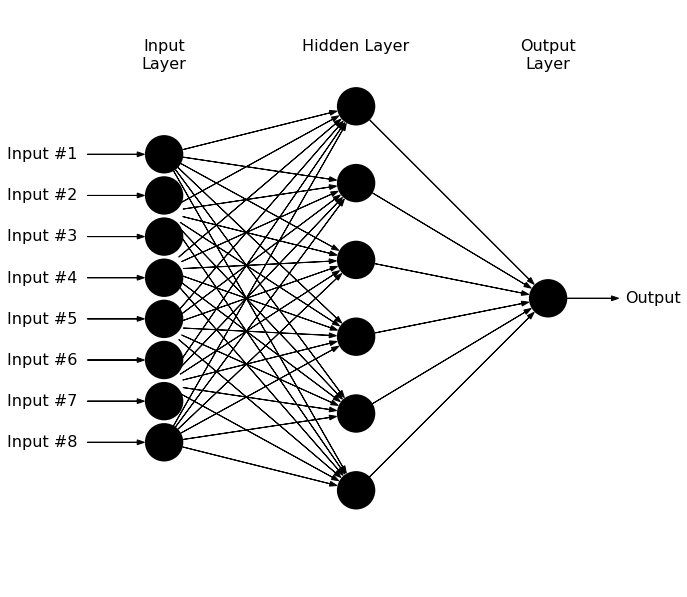

In [460]:
import numpy as np
from matplotlib import pyplot as plt

fig = plt.figure(facecolor='w')
ax = fig.add_axes([0, 0, 2, 2],
                  xticks=[], yticks=[])
plt.box(False)
circ = plt.Circle((1, 1), 2)

radius = 0.2

arrow_kwargs = dict(head_width=0.05, fc='black')


# function to draw arrows
def draw_connecting_arrow(ax, circ1, rad1, circ2, rad2):
    theta = np.arctan2(circ2[1] - circ1[1],
                       circ2[0] - circ1[0])

    starting_point = (circ1[0] + rad1 * np.cos(theta),
                      circ1[1] + rad1 * np.sin(theta))

    length = (circ2[0] - circ1[0] - (rad1 + 1.4 * rad2) * np.cos(theta),
              circ2[1] - circ1[1] - (rad1 + 1.4 * rad2) * np.sin(theta))

    ax.arrow(starting_point[0], starting_point[1],
             length[0], length[1], **arrow_kwargs)


# function to draw circles
def draw_circle(ax, center, radius):
    circ = plt.Circle(center, radius, fc='black', lw=2)
    ax.add_patch(circ)

x1 = -2
x2 = 0
x3 = 2
y3 = 0

#------------------------------------------------------------
# draw circles
for i, y1 in enumerate(np.linspace(1.5, -1.5, 8)):
    draw_circle(ax, (x1, y1), radius)
    ax.text(x1 - 0.9, y1, 'Input #%i' % (i + 1),
            ha='right', va='center', fontsize=16)
    draw_connecting_arrow(ax, (x1 - 0.9, y1), 0.1, (x1, y1), radius)

for y2 in np.linspace(-2, 2, 6):
    draw_circle(ax, (x2, y2), radius)

draw_circle(ax, (x3, y3), radius)
ax.text(x3 + 0.8, y3, 'Output', ha='left', va='center', fontsize=16)
draw_connecting_arrow(ax, (x3, y3), radius, (x3 + 0.8, y3), 0.1)

#------------------------------------------------------------
# draw connecting arrows
for y1 in np.linspace(-1.5, 1.5, 6):
    for y2 in np.linspace(-2, 2, 6):
        draw_connecting_arrow(ax, (x1, y1), radius, (x2, y2), radius)

for y2 in np.linspace(-2, 2, 6):
    draw_connecting_arrow(ax, (x2, y2), radius, (x3, y3), radius)

#------------------------------------------------------------
# Add text labels
plt.text(x1, 2.7, "Input\nLayer", ha='center', va='top', fontsize=16)
plt.text(x2, 2.7, "Hidden Layer", ha='center', va='top', fontsize=16)
plt.text(x3, 2.7, "Output\nLayer", ha='center', va='top', fontsize=16)

ax.set_aspect('equal')
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.show()

In [462]:
y_predict = np.round(y_predict)
y_predict

array([[ 1.],
       [ 1.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 1.],
       [ 2.],
       [ 1.],
       [ 2.],
       [ 3.],
       [ 2.],
       [ 1.],
       [ 2.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 2.],
       [ 1.],
       [ 2.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 3.],
       [ 1.],
       [ 1.],
       [ 2.],
       [ 1.],
       [ 2.],
       [ 3.],
       [ 1.],
       [ 3.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 2.],
       [ 1.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 1.],
       [ 1.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 1.],
       [ 3.],
       [ 1.],
       [ 3.],
       [ 1.],
       [ 2.],
       [ 2.],
       [ 3.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 2.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 2.],
       [ 1.],
       [ 2.],
       [ 3.],
       [ 2.],
      

## Change number to string to make it easy to recognize the class.

In [463]:
df = pd.DataFrame(y_predict)
df.columns = ['New_y']
NewX_test = X_test
New_X_test = NewX_test.reset_index(drop=True)
df['New_y'] = df['New_y'].map({0.0:'High Efficiency',1.0:'High Efficiency', 2.0:'Avg Efficiency', 3.0:'Low Efficiency', 4.0:'Low Efficiency'})
new_data = pd.concat([New_X_test, df], axis=1)
new_data

,X1,X2,X3,X4,X5,X6,X7,X8,New_y
0,0.66,759.5,318.5,220.50,3.5,3,0.40,3,High Efficiency
1,0.74,686.0,245.0,220.50,3.5,4,0.10,2,High Efficiency
2,0.79,637.0,343.0,147.00,7.0,3,0.10,2,Avg Efficiency
3,0.82,612.5,318.5,147.00,7.0,4,0.00,0,Avg Efficiency
4,0.98,514.5,294.0,110.25,7.0,3,0.40,1,Avg Efficiency
5,0.90,563.5,318.5,122.50,7.0,5,0.10,2,Avg Efficiency
6,0.98,514.5,294.0,110.25,7.0,4,0.25,2,Avg Efficiency
7,0.82,612.5,318.5,147.00,7.0,2,0.40,2,Avg Efficiency
8,0.86,588.0,294.0,147.00,7.0,5,0.25,3,Avg Efficiency
9,0.82,612.5,318.5,147.00,7.0,2,0.10,4,Avg Efficiency


## Plot 

Text(0,0.5,'Frequency')

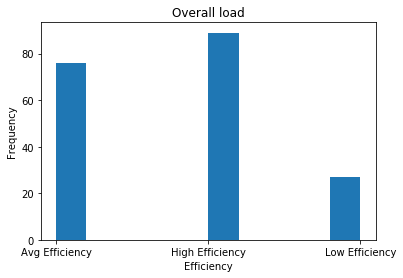

In [464]:
import matplotlib.pyplot as plt
plt.hist(df)
plt.title("Overall load")
plt.xlabel("Efficiency")
plt.ylabel("Frequency")

## Overall Conclusion

After running neural network, I found that the model got a little lower R2 score compare to the Decision Tree Classification model. However, the difference between the training data set and the test data set has become smaller. Therefore, I will use the neural network model for prediction.

In the model, I used the relu in order to save time and got a better R2 score. I also used 6 hidden layer in order to get the highest R2 score. Moreover, I applied the grid search on the model to find the best parameter 'batch_size' which is 5 and 50 for epochs.

The following plot is the result to see the distribution of different level of efficient in the data.